# Bussiness Problems

*In order to gain a comprehensive overview of our lending operation and monitor the performance of loans,we amin 
to create a grid view report categorized by loan status*
*by providing insights into metrics such as 
*Total Loan Applications
*Total Funded amount
*Total Amount Recived
*Month-to-Date(MTD)Funded Amount
*MTD Amount Received
*Average Interest Recived
*Average Debt-to-Income Ratio(DTI)
*This Analysis Report will empower us to make date-driven decisions and assess the health of our loan portfolio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("financial_loan.csv")
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


# Data understanding 

1.id : Unique Loan Id
2.address_state: The state where the borrower lives
3.application_type: The type of loan application, such as individual or joint (with co-applicants).
4.Employment Length: How long the borrower has been employed at their current job (e.g., 10+ years).
5.emp_title: The job title or position of the borrower (e.g. MKC Accounting)employment.
6.grade: A rating given to the loan based on risk or credit quality, usually assigned by the lender.
7.home_ownership: The borrower's current housing situation, such as owning a home, renting, or living with family.
8.issue_date: The date when the loan was issued or approved.
9.last_credit_pull_date: The most recent date when the borrower's credit report was checked.
10.last_payment_date: The date of the borrower’s most recent loan payment.
11.loan_status: The current status of the loan, such as “Fully Paid,” “Charged Off,” or “In Default.”
12.next_payment_date: The date when the borrower’s next loan payment is due. 
13.member_id: A unique identifier for the borrower or member in the lending system.
14.purpose: The reason the loan was taken out, such as for debt consolidation, home improvement, or education.
15.sub_grade: A more detailed loan grade, often used to assess risk more precisely than the general grade.
16.term: The length of time over which the loan will be repaid, typically in months (e.g., 36 months).
17.verification_status: Indicates whether the borrower’s income and employment details have been verified.
18.annual_income: The borrower’s total income per year.
19.dti: The debt-to-income ratio, which shows the borrower’s total debt payments compared to their income (a measure of financial health).
20.installment: The amount the borrower pays each month towards the loan.
21.int_rate: The interest rate charged on the loan, usually expressed as a percentage.
22.loan_amount: The total amount of money borrowed.
23.total_acc: The total number of accounts the borrower has, which can include credit cards, loans, etc.
24.total_payment: The total amount paid towards the loan so far.

In [3]:
df.shape

(38576, 24)

In [4]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [6]:
df.shape

(38576, 24)

In [7]:
df["id"].unique()

array([1077430, 1072053, 1069243, ...,  875376,  972997,  682952],
      dtype=int64)

In [8]:
df["id"].value_counts()

id
1077430    1
317833     1
477433     1
478263     1
443318     1
          ..
351620     1
222829     1
469798     1
857617     1
682952     1
Name: count, Length: 38576, dtype: int64

In [9]:
df["address_state"].unique()

array(['GA', 'CA', 'TX', 'IL', 'PA', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI',
       'NV', 'UT', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT',
       'MN', 'CO', 'TN', 'VA', 'MO', 'DE', 'NM', 'LA', 'AR', 'KY', 'NC',
       'SC', 'WV', 'KS', 'WY', 'OR', 'AL', 'VT', 'MS', 'DC', 'MT', 'SD',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [10]:
df["address_state"].value_counts()

address_state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
IL    1486
PA    1482
VA    1375
GA    1355
MA    1310
OH    1188
MD    1027
AZ     833
WA     805
CO     770
NC     759
CT     730
MI     685
MO     660
MN     592
NV     482
SC     464
WI     446
OR     436
AL     432
LA     426
KY     320
OK     293
KS     260
UT     252
AR     236
DC     214
RI     196
NM     183
HI     170
WV     167
NH     161
DE     110
WY      79
MT      79
AK      78
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: count, dtype: int64

In [11]:
df["application_type"].unique()# all the application of loan are for the individual person only

array(['INDIVIDUAL'], dtype=object)

In [12]:
df["application_type"].value_counts()

application_type
INDIVIDUAL    38576
Name: count, dtype: int64

# Drop Unimportant columns

In [13]:
df.drop(columns="application_type",inplace=True)

In [14]:
df["emp_length"].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [15]:
df["emp_length"].value_counts()

emp_length
10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: count, dtype: int64

In [16]:
df["emp_title"].unique()

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc', ...,
       'Anaheim Regional Medical Center', 'Brooklyn Radiology',
       'Allen Edmonds'], dtype=object)

In [17]:
df["emp_title"].value_counts()

emp_title
US Army                           135
Bank of America                   109
IBM                                67
AT&T                               63
Wells Fargo                        57
                                 ... 
Emeril's Delmonico's                1
The Shafer Law Group                1
U.S navy                            1
Wellspring Healthcare Services      1
Allen Edmonds                       1
Name: count, Length: 28525, dtype: int64

# Drop Unimportant columns

In [18]:
df.drop(columns="emp_title",inplace=True)

In [19]:
df["grade"].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [20]:
df["grade"].value_counts()

grade
B    11674
A     9689
C     7904
D     5182
E     2786
F     1028
G      313
Name: count, dtype: int64

In [21]:
df["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [22]:
df["home_ownership"].value_counts()

home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: count, dtype: int64

In [23]:
df["issue_date"].unique()


array(['11-02-2021', '01-01-2021', '05-01-2021', '25-02-2021',
       '17-07-2021', '19-11-2021', '11-06-2021', '02-09-2021',
       '09-02-2021', '22-07-2021', '11-09-2021', '11-08-2021',
       '11-12-2021', '11-10-2021', '02-12-2021', '09-10-2021',
       '12-12-2021', '02-02-2021', '07-07-2021', '08-01-2021',
       '09-08-2021', '11-01-2021', '11-11-2021', '09-06-2021',
       '10-01-2021', '11-05-2021', '10-03-2021', '10-05-2021',
       '09-05-2021', '11-04-2021', '09-07-2021', '09-12-2021',
       '09-11-2021', '09-03-2021', '08-10-2021', '08-03-2021',
       '08-11-2021', '07-09-2021', '08-02-2021', '07-08-2021',
       '09-01-2021', '10-12-2021', '11-03-2021', '10-07-2021',
       '11-07-2021', '09-04-2021', '10-02-2021', '10-08-2021',
       '10-04-2021', '10-11-2021', '10-10-2021', '10-06-2021',
       '09-09-2021', '08-08-2021', '10-09-2021', '08-12-2021',
       '08-05-2021', '08-06-2021', '08-09-2021', '08-07-2021',
       '08-04-2021', '07-11-2021', '07-10-2021', '07-12

In [24]:
df["issue_date"].value_counts() 

issue_date
11-12-2021    2188
11-11-2021    2120
11-10-2021    2025
11-09-2021    1980
11-08-2021    1873
              ... 
02-09-2021       1
22-07-2021       1
12-12-2021       1
02-02-2021       1
07-06-2021       1
Name: count, Length: 65, dtype: int64

In [25]:
# Convert the 'date' column to datetime format
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')

# Extract day, month, and year
df['day'] = df['issue_date'].dt.day
df['month'] = df['issue_date'].dt.month
df['year'] = df['issue_date'].dt.year

print(df)

            id address_state emp_length grade home_ownership issue_date  \
0      1077430            GA   < 1 year     C           RENT 2021-02-11   
1      1072053            CA    9 years     E           RENT 2021-01-01   
2      1069243            CA    4 years     C           RENT 2021-01-05   
3      1041756            TX   < 1 year     B       MORTGAGE 2021-02-25   
4      1068350            IL  10+ years     A       MORTGAGE 2021-01-01   
...        ...           ...        ...   ...            ...        ...   
38571   803452            NJ   < 1 year     C       MORTGAGE 2021-07-11   
38572   970377            NY    8 years     C           RENT 2021-10-11   
38573   875376            CA    5 years     D           RENT 2021-09-11   
38574   972997            NY    5 years     D           RENT 2021-10-11   
38575   682952            NY    4 years     F           RENT 2021-07-11   

      last_credit_pull_date last_payment_date  loan_status next_payment_date  \
0                13

In [26]:
df.drop(columns="issue_date",inplace=True)

In [27]:
df.drop(columns="year",inplace=True)# because this data is of one year only

In [28]:
df["month"].unique()

array([ 2,  1,  7, 11,  6,  9,  8, 12, 10,  5,  3,  4])

In [29]:
# Dictionary mapping month numbers to names
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Replace the month numbers with their corresponding names
df['month'] = df['month'].replace(month_mapping)

# Output the updated DataFrame
print(df)


            id address_state emp_length grade home_ownership  \
0      1077430            GA   < 1 year     C           RENT   
1      1072053            CA    9 years     E           RENT   
2      1069243            CA    4 years     C           RENT   
3      1041756            TX   < 1 year     B       MORTGAGE   
4      1068350            IL  10+ years     A       MORTGAGE   
...        ...           ...        ...   ...            ...   
38571   803452            NJ   < 1 year     C       MORTGAGE   
38572   970377            NY    8 years     C           RENT   
38573   875376            CA    5 years     D           RENT   
38574   972997            NY    5 years     D           RENT   
38575   682952            NY    4 years     F           RENT   

      last_credit_pull_date last_payment_date  loan_status next_payment_date  \
0                13-09-2021        13-04-2021  Charged Off        13-05-2021   
1                14-12-2021        15-01-2021   Fully Paid        15-02

In [30]:
df

,id,address_state,emp_length,grade,home_ownership,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,...,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,day,month
0,1077430,GA,< 1 year,C,RENT,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,...,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,11,Feb
1,1072053,CA,9 years,E,RENT,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,...,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,1,Jan
2,1069243,CA,4 years,C,RENT,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,...,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,5,Jan
3,1041756,TX,< 1 year,B,MORTGAGE,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,...,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,25,Feb
4,1068350,IL,10+ years,A,MORTGAGE,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,...,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,< 1 year,C,MORTGAGE,16-05-2021,16-05-2021,Current,16-06-2021,992381,...,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946,11,Jul
38572,970377,NY,8 years,C,RENT,16-04-2021,16-05-2021,Current,16-06-2021,1192039,...,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870,11,Oct
38573,875376,CA,5 years,D,RENT,16-05-2021,16-05-2021,Current,16-06-2021,1089898,...,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721,11,Sep
38574,972997,NY,5 years,D,RENT,16-05-2021,16-05-2021,Current,16-06-2021,1194971,...,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677,11,Oct


In [31]:
df["last_credit_pull_date"].unique()

array(['13-09-2021', '14-12-2021', '12-12-2021', '16-03-2021',
       '14-06-2021', '14-07-2021', '15-06-2021', '13-03-2021',
       '13-10-2021', '14-02-2021', '16-04-2021', '15-09-2021',
       '16-05-2021', '09-12-2021', '13-02-2021', '13-11-2021',
       '10-11-2021', '14-04-2021', '12-01-2021', '12-03-2021',
       '11-06-2021', '13-12-2021', '12-06-2021', '14-03-2021',
       '11-04-2021', '11-11-2021', '15-02-2021', '11-07-2021',
       '10-12-2021', '11-01-2021', '07-08-2021', '10-05-2021',
       '12-09-2021', '10-09-2021', '10-02-2021', '11-03-2021',
       '16-02-2021', '12-05-2021', '11-02-2021', '14-10-2021',
       '14-01-2021', '11-09-2021', '14-11-2021', '14-09-2021',
       '15-12-2021', '12-11-2021', '15-11-2021', '14-08-2021',
       '15-07-2021', '11-12-2021', '15-10-2021', '13-08-2021',
       '10-03-2021', '11-08-2021', '16-01-2021', '13-07-2021',
       '13-04-2021', '14-05-2021', '13-05-2021', '15-05-2021',
       '12-08-2021', '15-01-2021', '11-05-2021', '15-04

In [32]:
df["last_credit_pull_date"].value_counts()

last_credit_pull_date
16-05-2021    10041
16-04-2021     2477
16-03-2021     1096
13-02-2021      832
16-02-2021      714
              ...  
07-05-2021        1
08-07-2021        1
20-01-2022        1
08-06-2021        1
07-07-2021        1
Name: count, Length: 107, dtype: int64

In [33]:
df["last_payment_date"].unique()

array(['13-04-2021', '15-01-2021', '09-01-2021', '12-03-2021',
       '12-08-2021', '13-12-2021', '14-07-2021', '12-10-2021',
       '16-03-2021', '13-08-2021', '13-09-2021', '14-12-2021',
       '13-10-2021', '12-11-2021', '15-02-2021', '10-08-2021',
       '10-02-2021', '11-06-2021', '08-08-2021', '13-06-2021',
       '09-12-2021', '12-02-2021', '12-07-2021', '10-07-2021',
       '13-01-2021', '11-08-2021', '11-10-2021', '11-01-2021',
       '13-07-2021', '09-10-2021', '13-11-2021', '10-11-2021',
       '11-03-2021', '11-07-2021', '12-06-2021', '11-12-2021',
       '09-09-2021', '13-05-2021', '14-03-2021', '08-04-2021',
       '10-10-2021', '10-05-2021', '11-02-2021', '10-09-2021',
       '10-04-2021', '10-06-2021', '12-05-2021', '14-10-2021',
       '14-06-2021', '14-05-2021', '14-01-2021', '14-04-2021',
       '11-09-2021', '14-08-2021', '14-11-2021', '12-01-2021',
       '14-02-2021', '12-12-2021', '12-04-2021', '13-02-2021',
       '14-09-2021', '10-03-2021', '11-11-2021', '11-04

In [34]:
df["last_payment_date"].value_counts()

last_payment_date
16-05-2021    1209
13-03-2021    1001
14-12-2021     909
13-05-2021     884
13-02-2021     845
              ... 
08-11-2021      10
08-06-2021      10
08-03-2021       5
08-01-2021       4
08-02-2021       1
Name: count, Length: 102, dtype: int64

In [35]:
df["loan_status"].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [36]:
df["loan_status"].value_counts()

loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64

In [37]:
df["next_payment_date"].unique()

array(['13-05-2021', '15-02-2021', '09-02-2021', '12-04-2021',
       '12-09-2021', '13-01-2022', '14-08-2021', '12-11-2021',
       '16-04-2021', '13-09-2021', '13-10-2021', '14-01-2022',
       '13-11-2021', '12-12-2021', '15-03-2021', '10-09-2021',
       '10-03-2021', '11-07-2021', '08-09-2021', '13-07-2021',
       '09-01-2022', '12-03-2021', '12-08-2021', '10-08-2021',
       '13-02-2021', '11-09-2021', '11-11-2021', '11-02-2021',
       '13-08-2021', '09-11-2021', '13-12-2021', '10-12-2021',
       '11-04-2021', '11-08-2021', '12-07-2021', '11-01-2022',
       '09-10-2021', '13-06-2021', '14-04-2021', '08-05-2021',
       '10-11-2021', '10-06-2021', '11-03-2021', '10-10-2021',
       '10-05-2021', '10-07-2021', '12-06-2021', '14-11-2021',
       '14-07-2021', '14-06-2021', '14-02-2021', '14-05-2021',
       '11-10-2021', '14-09-2021', '14-12-2021', '12-02-2021',
       '14-03-2021', '12-01-2022', '12-05-2021', '13-03-2021',
       '14-10-2021', '10-04-2021', '11-12-2021', '11-05

In [38]:
df["next_payment_date"].value_counts()

next_payment_date
16-06-2021    1209
13-04-2021    1001
14-01-2022     909
13-06-2021     884
13-03-2021     845
              ... 
08-12-2021      10
08-07-2021      10
08-04-2021       5
08-02-2021       4
08-03-2021       1
Name: count, Length: 102, dtype: int64

In [39]:
df["member_id"].nunique()

38576

In [40]:
df["member_id"].value_counts()

member_id
1314167    1
317830     1
605588     1
607168     1
539366     1
          ..
354316     1
222675     1
592798     1
1070101    1
872217     1
Name: count, Length: 38576, dtype: int64

In [41]:
df["purpose"].unique()

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

In [42]:
df["purpose"].value_counts()

purpose
Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
small business         1776
car                    1497
wedding                 928
medical                 667
moving                  559
house                   366
vacation                352
educational             315
renewable_energy         94
Name: count, dtype: int64

In [43]:
df["sub_grade"].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [44]:
df["sub_grade"].value_counts()

sub_grade
B3    2834
A4    2803
A5    2654
B5    2644
B4    2455
C1    2089
B2    1990
C2    1972
B1    1751
A3    1740
C3    1490
A2    1440
D2    1314
C4    1202
C5    1151
D3    1144
A1    1052
D4     960
D1     913
D5     851
E1     750
E2     640
E3     538
E4     448
E5     410
F1     325
F2     243
F3     182
F4     163
F5     115
G1     101
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [45]:
df["term"].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [46]:
df["term"].value_counts()

term
36 months    28237
60 months    10339
Name: count, dtype: int64

In [47]:
df["verification_status"].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [48]:
df["verification_status"].value_counts()

verification_status
Not Verified       16464
Verified           12335
Source Verified     9777
Name: count, dtype: int64

In [49]:
df["annual_income"].unique()

array([ 30000. ,  48000. ,  50000. , ...,  44250. ,  57040.5, 368000. ])

In [50]:
df["annual_income"].value_counts()

annual_income
60000.00     1471
50000.00     1033
40000.00      859
45000.00      810
75000.00      802
             ... 
47838.00        1
38000.04        1
35570.00        1
171600.00       1
368000.00       1
Name: count, Length: 5096, dtype: int64

In [51]:
df["dti"].unique()

array([0.01  , 0.0535, 0.2088, ..., 0.2721, 0.2543, 0.272 ])

In [52]:
df["dti"].value_counts()

dti
0.0000    173
0.1200     48
0.1800     44
0.1920     40
0.1680     38
         ... 
0.2694      1
0.2960      1
0.2961      1
0.2670      1
0.2720      1
Name: count, Length: 2863, dtype: int64

In [53]:
df["installment"].unique()


array([ 59.83, 109.43, 421.65, ..., 164.99, 113.5 , 627.93])

In [54]:
df["installment"].value_counts()

installment
311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
459.53     1
215.15     1
167.29     1
218.66     1
627.93     1
Name: count, Length: 15132, dtype: int64

In [55]:
df["int_rate"].unique()


array([0.1527, 0.1864, 0.1596, 0.1065, 0.0603, 0.1465, 0.1427, 0.079 ,
       0.089 , 0.1269, 0.1242, 0.1171, 0.0991, 0.1629, 0.0743, 0.1114,
       0.1109, 0.0766, 0.0751, 0.0963, 0.0894, 0.1148, 0.1149, 0.157 ,
       0.0788, 0.0705, 0.1189, 0.1074, 0.1284, 0.0749, 0.0849, 0.1136,
       0.1199, 0.1095, 0.1099, 0.1221, 0.1241, 0.1134, 0.1399, 0.1367,
       0.1677, 0.1   , 0.0807, 0.0863, 0.0976, 0.1393, 0.0712, 0.1046,
       0.092 , 0.1166, 0.1091, 0.1103, 0.074 , 0.0768, 0.0662, 0.0599,
       0.0699, 0.0729, 0.0542, 0.0676, 0.0774, 0.0692, 0.0932, 0.0617,
       0.0639, 0.0579, 0.08  , 0.0859, 0.0714, 0.0691, 0.0737, 0.0832,
       0.0925, 0.1075, 0.0999, 0.1036, 0.1025, 0.1111, 0.1126, 0.1218,
       0.1059, 0.0962, 0.1037, 0.1158, 0.0988, 0.1062, 0.1253, 0.1051,
       0.1287, 0.1273, 0.138 , 0.1472, 0.1347, 0.1523, 0.1426, 0.1268,
       0.1311, 0.1417, 0.1349, 0.1304, 0.1599, 0.1595, 0.1533, 0.0654,
       0.1183, 0.1357, 0.1306, 0.1422, 0.1316, 0.1496, 0.1565, 0.1474,
      

In [56]:
df["int_rate"].value_counts()

int_rate
0.1099    932
0.1349    811
0.1149    796
0.0751    755
0.0788    701
         ... 
0.2264      1
0.1671      1
0.1620      1
0.1601      1
0.1754      1
Name: count, Length: 371, dtype: int64

In [57]:
df["loan_amount"].unique()

array([ 2500,  3000, 12000,  4500,  3500,  8000,  6000,  5500, 24000,
        4125,  5400, 11200,  5000,  3050, 10000,  2225,  4000,  7000,
        9000,  4800,  6300,  4750,  1850,  4200,  7200,  2400,  7500,
        5550, 22000,  3200, 11000,  4400,  8500,  2000,  7400,  5650,
        1800,  6500, 15000,  8700,  5600,  4600,  3800, 16000,  1300,
        7800,  5900,  3600,  2100,  4975,  1925,  1500,  7750,  9600,
        3900, 12975,  5950,  5100,  5200,  1200,  4650,  1450,  3250,
        3300,  1700,  5525, 18000,  1750,  5375,  9500,  7600,  6400,
        9900,  1000, 10400, 23500, 22600, 23600, 13100,  5800, 10800,
        1900,  8400,  3075,  6200, 11500,  4350,  4150,  4900,  6125,
        2425,  1600,  7100,  8900, 14000, 12250,  3700, 17000,  2550,
        6250, 14400,  8200,  9250,  3375,  1675,  8600,  2800,  3525,
        8800,  2250,  4375,  1275,  5050, 25000,  9800,  6600,  8250,
        2825,  5975,  3350, 20000, 19000,  2200, 14750,  9575, 13250,
        2350, 10625,

In [58]:
df["loan_amount"].value_counts()

loan_amount
10000    2761
12000    2295
5000     1977
15000    1860
6000     1852
         ... 
15675       1
24175       1
5725        1
1625        1
24975       1
Name: count, Length: 880, dtype: int64

In [59]:
df["total_acc"].unique()

array([ 4, 11,  9, 28, 30, 23, 31, 21, 33, 13,  3, 15, 18, 14,  8,  7, 20,
       39, 24, 10, 19, 27,  6, 16, 45, 25,  5, 43, 29, 22, 41, 35, 44, 36,
       17, 26, 37, 32, 47, 52, 42, 46, 12, 50, 34, 59, 38, 63, 49, 48, 61,
       51, 55, 40, 53, 62, 58, 67, 54, 57, 56, 70,  2, 64, 60, 80, 79, 71,
       66, 65, 69, 90, 68, 74, 75, 87, 78, 72, 77, 81, 76, 73],
      dtype=int64)

In [60]:
df["total_acc"].value_counts()

total_acc
16    1435
15    1420
17    1408
14    1405
20    1398
      ... 
68       1
90       1
69       1
71       1
73       1
Name: count, Length: 82, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   emp_length             38576 non-null  object 
 3   grade                  38576 non-null  object 
 4   home_ownership         38576 non-null  object 
 5   last_credit_pull_date  38576 non-null  object 
 6   last_payment_date      38576 non-null  object 
 7   loan_status            38576 non-null  object 
 8   next_payment_date      38576 non-null  object 
 9   member_id              38576 non-null  int64  
 10  purpose                38576 non-null  object 
 11  sub_grade              38576 non-null  object 
 12  term                   38576 non-null  object 
 13  verification_status    38576 non-null  object 
 14  annual_income          38576 non-null  float64
 15  dt

In [62]:
df["total_payment"].unique()

array([ 1009,  3939,  3522, ..., 31870, 35721, 33677], dtype=int64)

In [63]:
df["total_payment"].value_counts()

total_payment
6515     32
11200    31
11197    26
6720     25
5600     23
         ..
11952     1
17003     1
29414     1
3364      1
33677     1
Name: count, Length: 19525, dtype: int64

In [64]:
df.columns

Index(['id', 'address_state', 'emp_length', 'grade', 'home_ownership',
       'last_credit_pull_date', 'last_payment_date', 'loan_status',
       'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term',
       'verification_status', 'annual_income', 'dti', 'installment',
       'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'day',
       'month'],
      dtype='object')

In [65]:
df.isnull().sum()# In emp_litle there are 1438 missing values

id                       0
address_state            0
emp_length               0
grade                    0
home_ownership           0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
day                      0
month                    0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   emp_length             38576 non-null  object 
 3   grade                  38576 non-null  object 
 4   home_ownership         38576 non-null  object 
 5   last_credit_pull_date  38576 non-null  object 
 6   last_payment_date      38576 non-null  object 
 7   loan_status            38576 non-null  object 
 8   next_payment_date      38576 non-null  object 
 9   member_id              38576 non-null  int64  
 10  purpose                38576 non-null  object 
 11  sub_grade              38576 non-null  object 
 12  term                   38576 non-null  object 
 13  verification_status    38576 non-null  object 
 14  annual_income          38576 non-null  float64
 15  dt

In [67]:
df.duplicated().sum()

0

# Data Preprocessing

### no wrong data type

### no missing values  

### Data type conversion

In [68]:
# converd the date columns to date and time fromat 
df['last_credit_pull_date'] = pd.to_datetime(df["last_credit_pull_date"], format='%d-%m-%Y')
df['last_payment_date'] = pd.to_datetime(df["last_payment_date"], format='%d-%m-%Y')
df['next_payment_date'] = pd.to_datetime(df["next_payment_date"], format='%d-%m-%Y')


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   emp_length             38576 non-null  object        
 3   grade                  38576 non-null  object        
 4   home_ownership         38576 non-null  object        
 5   last_credit_pull_date  38576 non-null  datetime64[ns]
 6   last_payment_date      38576 non-null  datetime64[ns]
 7   loan_status            38576 non-null  object        
 8   next_payment_date      38576 non-null  datetime64[ns]
 9   member_id              38576 non-null  int64         
 10  purpose                38576 non-null  object        
 11  sub_grade              38576 non-null  object        
 12  term                   38576 non-null  object        
 13  v

In [70]:
df["loan_status"].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [71]:
df['loan_status'] = df['loan_status'].replace({'Charged Off': 'Bad loan', 
                                               'Fully Paid': 'Good loan', 
                                               'Current': 'Good loan'})


In [72]:
continous=["loan_amount","total_payment","int_rate","installment","dti","annual_income"]
datetime=["last_credit_pull_date","last_credit_pull_date","last_payment_date"]
Discrete_categorial=["address_state","emp_length","grade","home_ownership","loan_status",
                    "purpose","sub_grade","term","verification_status","month"]
Discrete_count=["day","member_id","id","total_acc"]

# Exploratory Data Analysis(EDA)

### for continous variables

In [73]:
df[continous].describe()

,loan_amount,total_payment,int_rate,installment,dti,annual_income
count,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,3.857600e+04
mean,11296.066855,12263.348533,0.120488,326.862965,0.133274,6.964454e+04
std,7460.746022,9051.104777,0.037164,209.092000,0.066662,6.429368e+04
min,500.000000,34.000000,0.054200,15.690000,0.000000,4.000000e+03
25%,5500.000000,5633.000000,0.093200,168.450000,0.082100,4.150000e+04
50%,10000.000000,10042.000000,0.118600,283.045000,0.134200,6.000000e+04
75%,15000.000000,16658.000000,0.145900,434.442500,0.185900,8.320050e+04
max,35000.000000,58564.000000,0.245900,1305.190000,0.299900,6.000000e+06


In [74]:
df[continous].skew()

loan_amount       1.050775
total_payment     1.333828
int_rate          0.292264
installment       1.120447
dti              -0.029921
annual_income    31.074172
dtype: float64

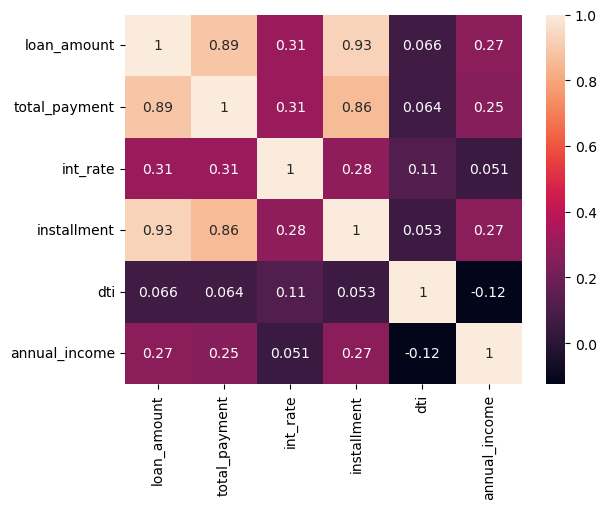

In [75]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

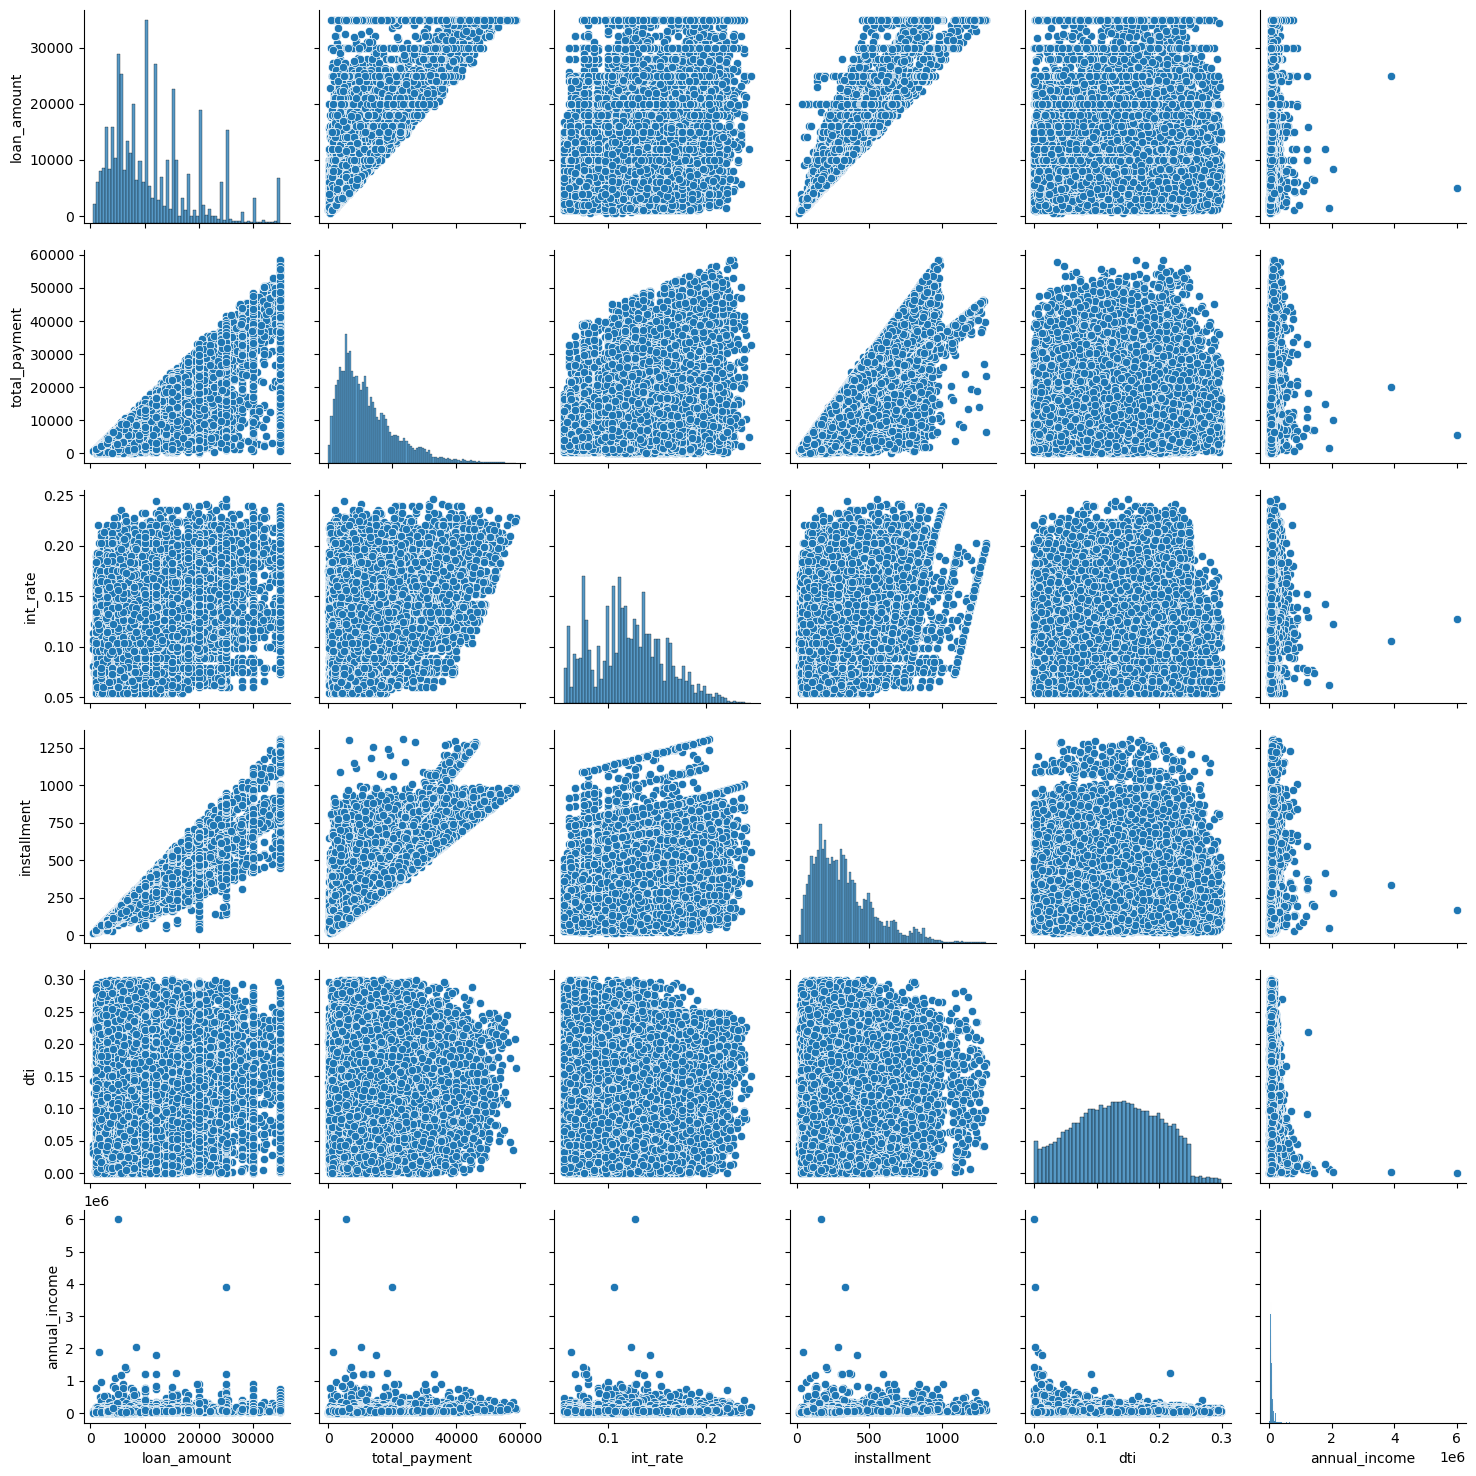

In [76]:
sns.pairplot(df[continous])
plt.show()

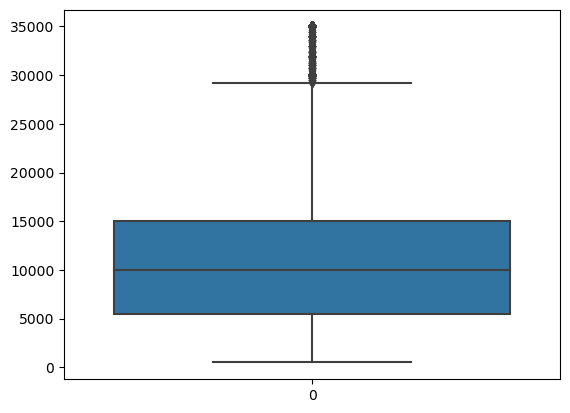

In [77]:
sns.boxplot(df["loan_amount"])
plt.show()

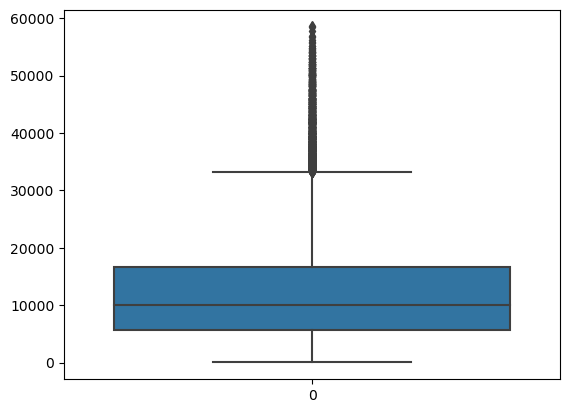

In [78]:
sns.boxplot(df["total_payment"])
plt.show()

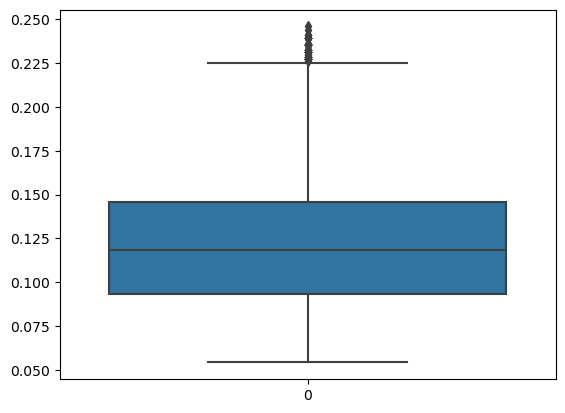

In [79]:
sns.boxplot(df["int_rate"])
plt.show()

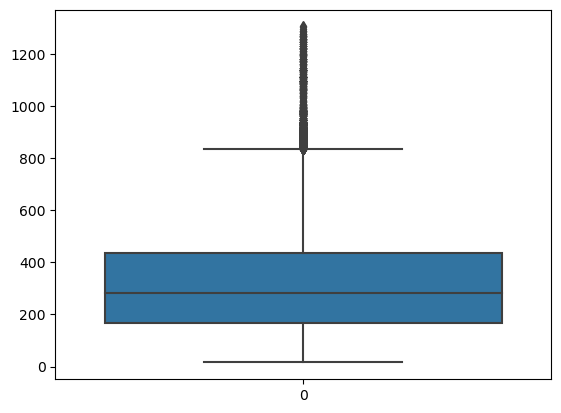

In [80]:
sns.boxplot(df["installment"])
plt.show()

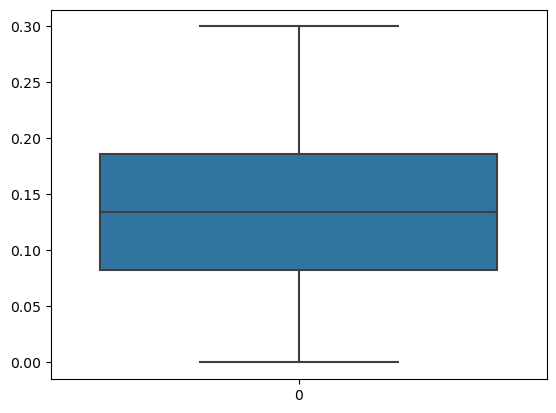

In [81]:
sns.boxplot(df["dti"])
plt.show()

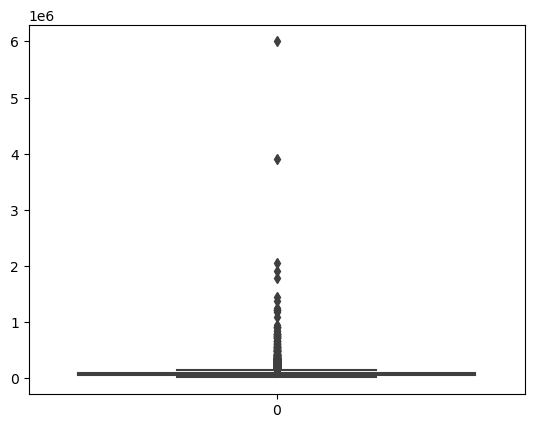

In [82]:
sns.boxplot(df["annual_income"])
plt.show()

### for Discrete_categorial variable

In [83]:
df[Discrete_categorial].describe()

,address_state,emp_length,grade,home_ownership,loan_status,purpose,sub_grade,term,verification_status,month
count,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576
unique,50,11,7,5,2,14,35,2,3,12
top,CA,10+ years,B,RENT,Good loan,Debt consolidation,B3,36 months,Not Verified,Dec
freq,6894,8870,11674,18439,33243,18214,2834,28237,16464,4314


In [84]:
df

,id,address_state,emp_length,grade,home_ownership,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,...,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,day,month
0,1077430,GA,< 1 year,C,RENT,2021-09-13,2021-04-13,Bad loan,2021-05-13,1314167,...,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,11,Feb
1,1072053,CA,9 years,E,RENT,2021-12-14,2021-01-15,Good loan,2021-02-15,1288686,...,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,1,Jan
2,1069243,CA,4 years,C,RENT,2021-12-12,2021-01-09,Bad loan,2021-02-09,1304116,...,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,5,Jan
3,1041756,TX,< 1 year,B,MORTGAGE,2021-12-12,2021-03-12,Good loan,2021-04-12,1272024,...,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,25,Feb
4,1068350,IL,10+ years,A,MORTGAGE,2021-12-14,2021-01-15,Good loan,2021-02-15,1302971,...,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,< 1 year,C,MORTGAGE,2021-05-16,2021-05-16,Good loan,2021-06-16,992381,...,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946,11,Jul
38572,970377,NY,8 years,C,RENT,2021-04-16,2021-05-16,Good loan,2021-06-16,1192039,...,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870,11,Oct
38573,875376,CA,5 years,D,RENT,2021-05-16,2021-05-16,Good loan,2021-06-16,1089898,...,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721,11,Sep
38574,972997,NY,5 years,D,RENT,2021-05-16,2021-05-16,Good loan,2021-06-16,1194971,...,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677,11,Oct


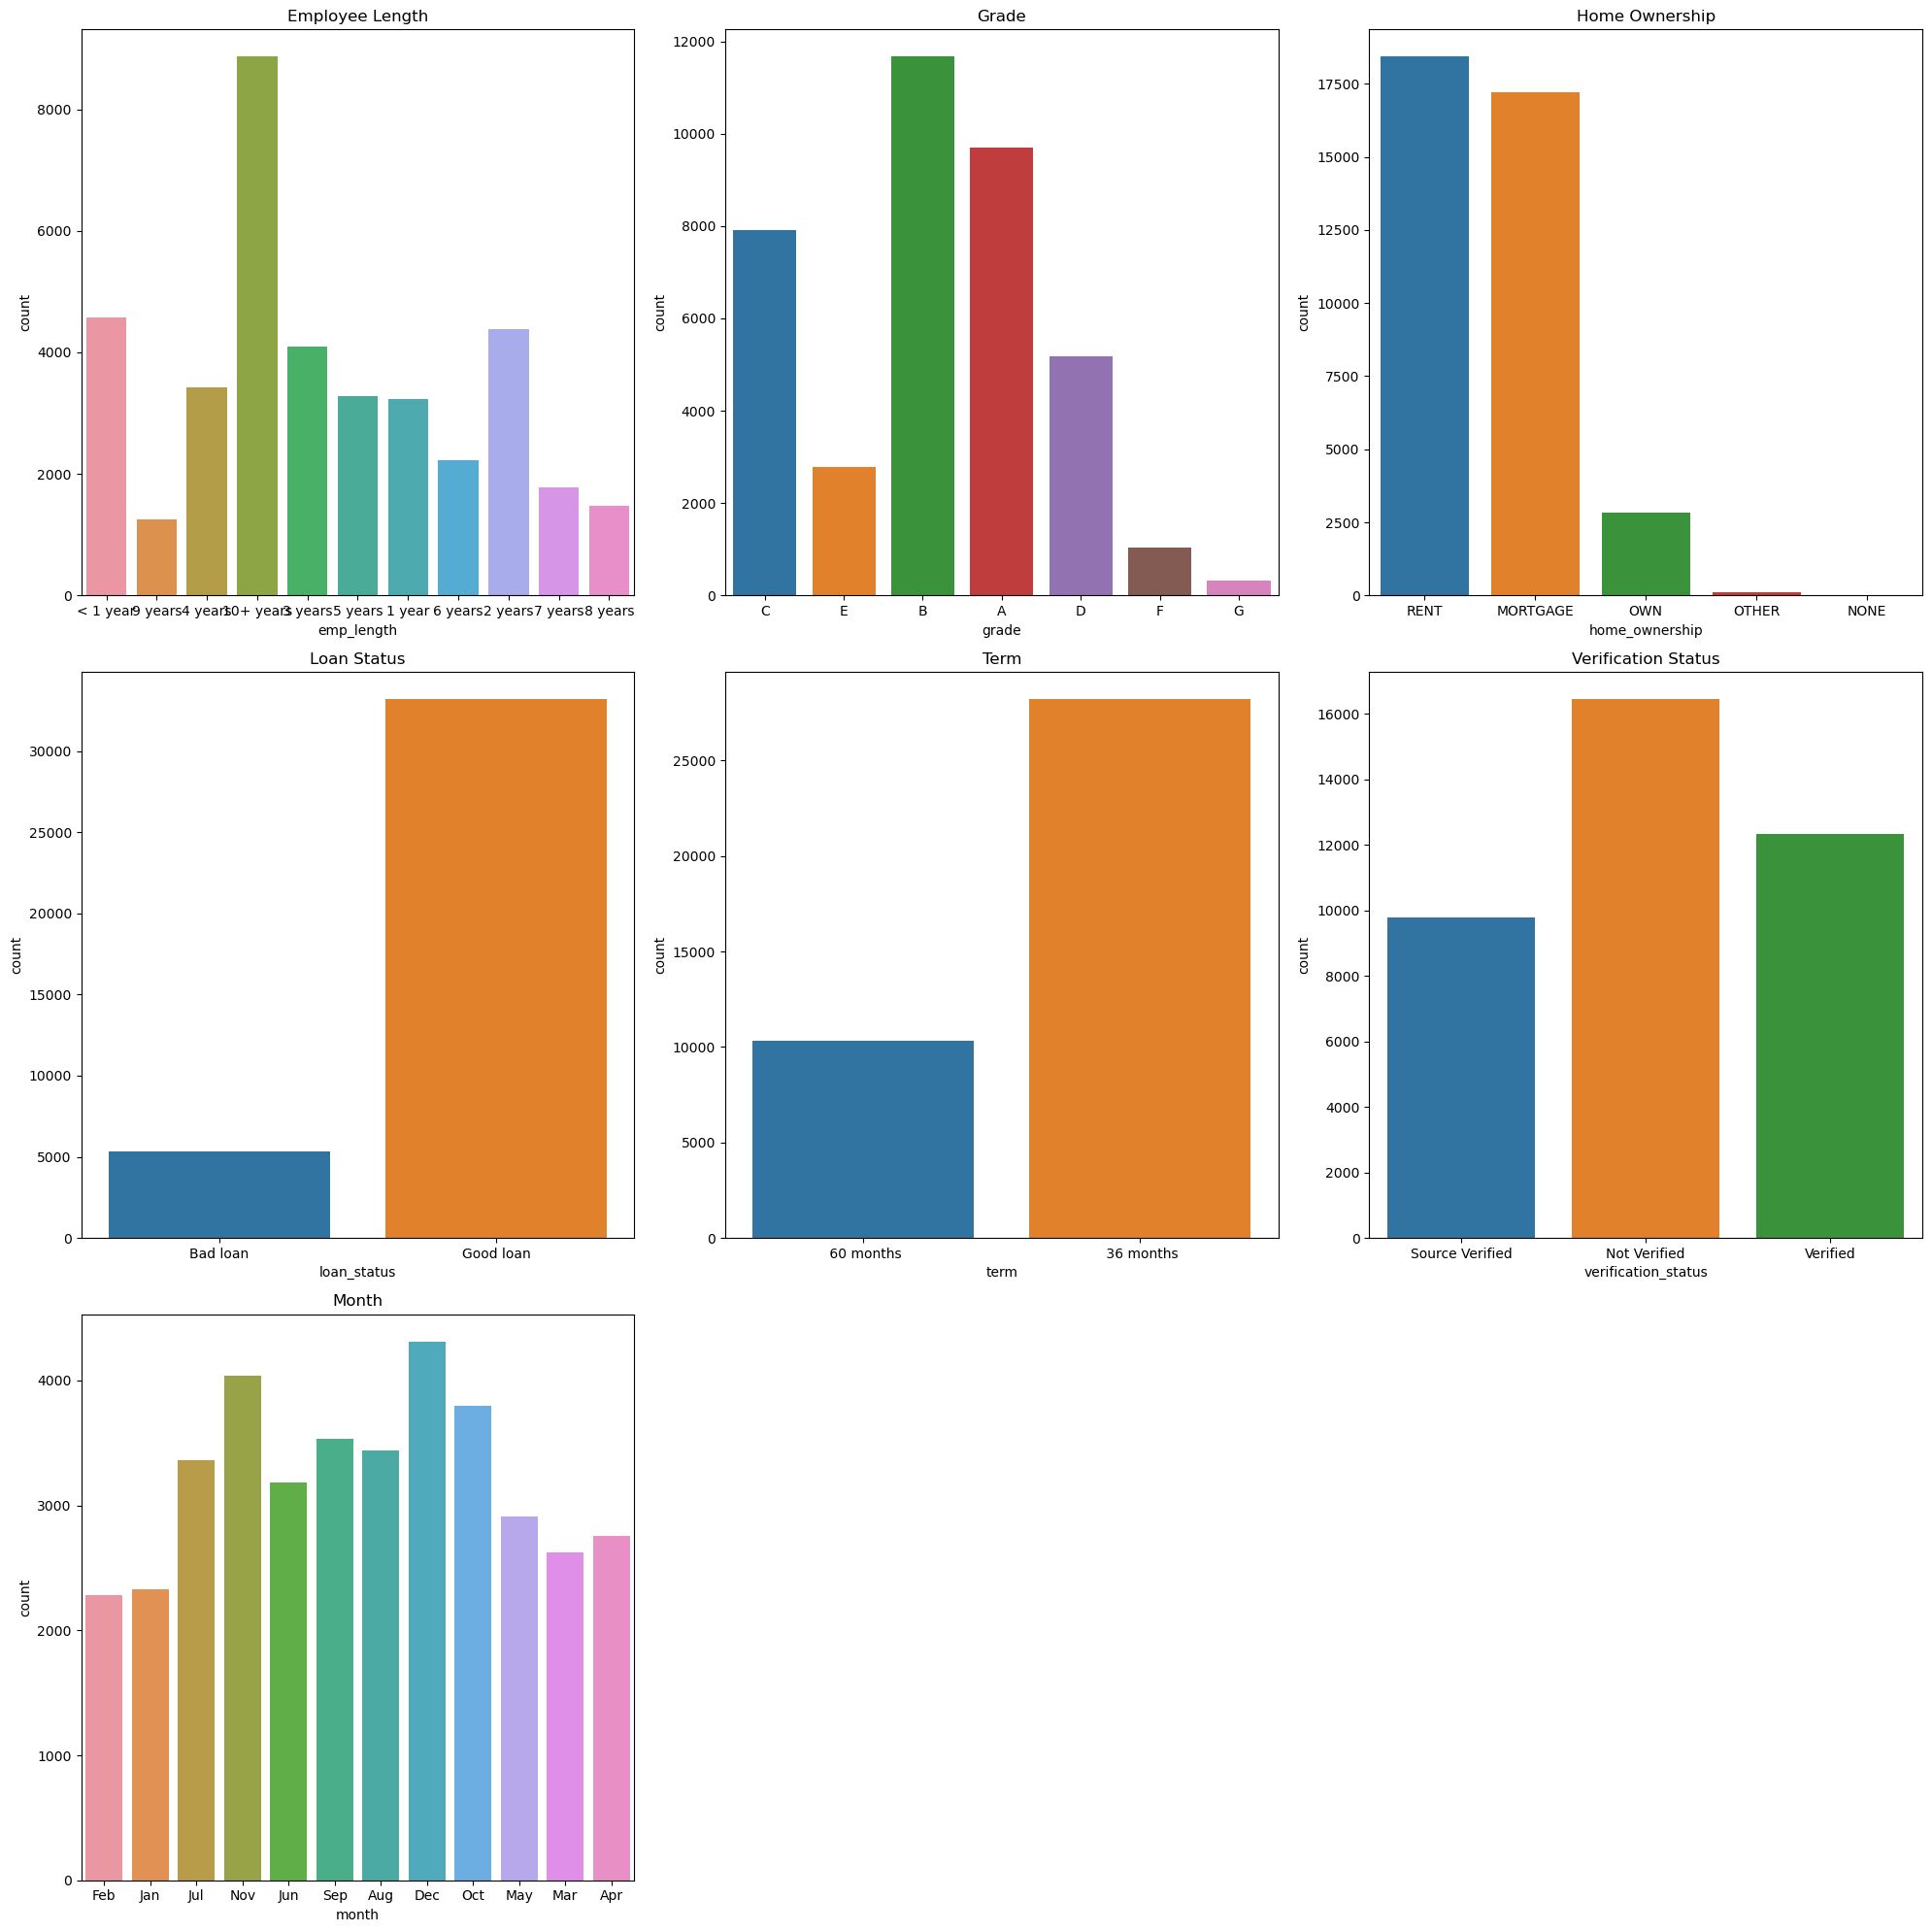

In [91]:

plt.figure(figsize=(20, 20))


plt.subplot(3, 3, 1)
sns.countplot(x=df["emp_length"])
plt.title("Employee Length")

plt.subplot(3, 3, 2)
sns.countplot(x=df["grade"])
plt.title("Grade")

plt.subplot(3, 3, 3)
sns.countplot(x=df["home_ownership"])
plt.title("Home Ownership")

plt.subplot(3, 3, 4)
sns.countplot(x=df["loan_status"])
plt.title("Loan Status")

plt.subplot(3, 3, 5)
sns.countplot(x=df["term"])
plt.title("Term")

plt.subplot(3, 3, 6)
sns.countplot(x=df["verification_status"])
plt.title("Verification Status")

plt.subplot(3, 3, 7)
sns.countplot(x=df["month"])
plt.title("Month")

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

In [86]:
# save the clearn file 

In [66]:
df.to_csv("clearn_financial_loan", index=False)

# Questions for Analysis

Q 1 Total loan Applications.(it will tell the count of the loan application)

Q2 good loan Application?(it will tell the count of the good loan and the bad loan)

Q 3 Total loan Application by state?(it tell the count of the loan application by state )

Q4 Total loan application by term?(it will tell the countof the loan application by term,mean it will divied data based on the 36month,amd 60month)

Q5 Tatal loan Application by purpose?

Q 6 Total loan Application by emp_length?

Q 7 Total loan Application by home ownership?

Q 8 Total funded amount?

Q9 Total Amount Recived?

Q11 month over month avg interest rate?

Q12 month over month total_loan_amount?

Q13 month over month total_loan_application?

## Good Loan

Q1 good loan application Percentage?
Q2 good loan application?
Q3 good loan funded amount?
Q4 good loan total received amount?

## Bad Loan

Q1 bad loan application percentage?
Q2 bad loan application?
Q3 bad loan funded amount?
Q4 bad loan toatl received amount?